# Représentation vectorielle des signaux

Un signal qui est échantillonné et à temps limité (c'est-à-dire nul ou non défini en dehors d'un intervalle)
peut se représenter par une séquence finie de valeurs numériques.
Dans le cas d'un signal $x$ défini sur $N$ échantillons, le signal est équivalent à un vecteur :

$$
  x = [ x_0 \, x_1 \, \dots \, x_{N-1} ]
$$

où les $x_n$ sont les échantillons du signal.
On notera $x\in\mathbb{C}^N$ pour signifier que $x$ est un signal échantillonné à temps limité de $N$ échantillons à valeurs complexes.

Notez que, par convention, le premier échantillon est indexé par 0.

L'équivalence entre signal échantillonné à temps limité et vecteur a plusieurs intérêts :
* on peut utiliser des outils de l'algèbre linéaire pour faire du traitement du signal ;
* on peut faire des interprétations géométriques ;
* c'est l'interprétation qui est faite dans les logiciels et les langages de calcul numérique, comme en Python.

::::{admonition} Exemple
:class: exemple

L'échelon $u$ et l'impulsion $\delta$ s'écrivent dont dans $\mathbb{R}^2$ :

$$
  u = [ 1 \, 1]
  \qquad\text{et}\qquad
  \delta = [1 \, 0].
$$

Leur représentation est donnée {numref}`F:vect:ex-graphe`.
Il s'agit simplement de signaux de deux échantillons. 
Les axes de cette représentation sont : les échantillons en abscisses, et les amplitudes en ordonnées.

:::{figure} ex-graphe.svg
:width: 600px
:name: F:vect:ex-graphe

Représentation de l'échelon et de l'impulsion de taille 2 sous forme de signaux.
:::

La représentation vectorelle de ces deux signaux se fait dans un espace à deux dimensions, comme dans la {numref}`F:vect:ex-espace`.
Les axes de cette représentation sont : le premier échantillon du signal en abscisse, et le deuxième échantillon en ordonnée.

:::{figure} ex-espace.svg
:width: 300px
:name: F:vect:ex-espace

Représentation de l'échelon et de l'impulsion de taille 2 sous forme de vecteurs.
:::
    
::::

## Quelques définitions

On peut définir les mêmes outils que ceux de la géométrie euclidienne pour les signaux échantillonnés à temps limité.


### Produit scalaire

Le _produit scalaire_ entre deux signaux $x$ et $y$ de taille $N$ est (la notation $\cdot^*$ signifie conjugué) :

$$
  \langle x,y \rangle = \sum_{n=0}^{N-1} x_n y_n^*.
$$

### Orthogonalité

Deux signaux sont _orthogonaux_ si et seulement si leur produit scalaire est nul.

### Norme

La _norme_ d'un signal $x$ de taille $N$ est :

$$
  \|x\| = \sqrt{\langle x,x \rangle} = \sqrt{ \sum_{n=0}^{N-1} |x_n|^2 }.
$$

### Énergie

L'_énergie_ d'un signal de taille $N$ est le carré de sa norme :

$$
  \|x\|^2 = \sum_{n=0}^{N-1} |x_n|^2.
$$

### Distance

La _distance_ entre deux signaux $x$ et $y$ de taille $N$ est la norme de la différence :

$$
  \|x-y\| = \sqrt{ \sum_{n=0}^{N-1} |x_n-y_n|^2 }.
$$

### Erreur quadratique moyenne

L'_erreur quadratique moyenne_ (EQM) entre deux signaux $x$ et $y$ de taille $N$ est :

$$
  \mathrm{EQM} = \frac{1}{N}\|x-y\|^2.
$$

### Base

Une _base_ est un ensemble de $N$ signaux tels que tout signal échantillonné de taille $N$ peut s'écrire comme une combinaison linéaire unique de signaux de cette base. Ainsi, si $\{\varphi_0,\, \varphi_1,\, \dots,\, \varphi_{N-1}\}$ est un ensemble de $N$ signaux formant une base, alors tout signal $x\in\mathbb{C}^N$ s'écrira

$$
  x = \sum_{k=0}^{N-1} \alpha_k \varphi_k
$$

où les $\alpha_k$ sont des coefficients uniques (il ne peut pas y avoir plusieurs jeux différents de coefficients $\{\alpha_k\}$).

Si en plus les vecteurs $\{\varphi_k\}$ de cette base sont orthogonaux deux à deux et de norme 1, alors la base est _orthonormée_.

::::{admonition} Exemple
:class: exemple

Pour $N=4$, les signaux $\delta[n-k]$ avec $k\in\{0,\dots,3\}$ forment une base, qui plus est orthonormée.

:::{figure} base-canonique.svg
:name: F:vect:base-canonique

Base canonique dans $\mathbb{R}^4$.
:::

Nous ne représentons pas ces quatre signaux sous forme de vecteur, car cela nécessite de les représenter dans un espace à quatre dimensions (or, votre écran n'en a que deux).

Cette base est d'ailleurs appelée _base canonique_ car c'est la base naturelle pour représenter les signaux. En effet, les échantillons de tout signal de taille $N$ correspondent aux coefficients $\alpha_k$.
    
::::

Parfois, il est intéressant de représenter les signaux dans une autre base que la base canonique : on parle alors de _décomposition_ ou de _projection_ d'un signal $x$ sur une base.
La [transformée de Fourier](C:fourier) peut être vue comme la décomposition de signaux dans une autre base.
De même, les techniques de compression (audio, image ou vidéo) utilisent astucieusement une décomposition dans une base particulière pour réduire le poids des données.
Les coefficients du signal dans cette nouvelle base vont donc être différents des coefficients de la base canonique.

La décomposition d'un signal $x$ de taille $N$ dans une base orthonormée $\{\varphi_k\}$, et donc le calcul des nouveaux coefficients $\alpha_k$, s'obtient en calculant le produit scalaire de $x$ avec chaque élément $\varphi_k$ de la base :

$$
  \forall k \in \{0,\dots,N-1\},\quad
  \alpha_k = \langle x, \varphi_k \rangle.
$$

La _reconstruction_ du signal $x$ consiste à réécrire le signal dans la base canonique depuis la base $\{\varphi_k\}$. Pour cela, le signal $x$ s'obtient par la somme des éléments de la base $\varphi_k$ pondérés par les coefficients $\alpha_k$ :

$$
  x = \sum_{k=0}^{N-1} \alpha_k \varphi_k.
$$

## Un exemple de l'intérêt de la décomposition sur une base

La compression d'un signal consiste à enregistrer ce signal en utilisant des techniques qui permettent de réduire sa place mémoire tout en conservant le maximum d'informations sur ce signal.
Il existe deux familles de compression :
* les techniques de compression sans perte permettent de gagner de la place mémoire sans modifier le signal, mais le gain en place mémoire est modéré ;
* les techniques de compression avec perte permettent de gagner beaucoup de place mémoire, mais le signal sera nécessairement modifié. Tout l'enjeu consiste à trouver une technique qui permette de réduire le plus possible l'encombrement mémoire tout en garantissant une perte d'information du signal qui soit maîtrisée.

Dans cet exemple, nous allons montrer effectuer la compression d'un signal audio
en utilisant sa décomposition dans une base appropriée : la base de Haar.
Pour cela, nous considérons des signaux de taille $N=16$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio, Markdown, display

import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

In [2]:
def haar(N):
    """Ondelettes de Haar 1D.
    
    N : nombre de fonctions de la base de Haar.
    
    vincent.mazet@unistra.fr, 20/07/2020
    """

    import numpy as np
    
    # Format de base
    f = [1, -1]
    
    # Premier signal (constant)
    h = np.ones(N)
    h = h / np.linalg.norm(h)
    hh = [h]      
    
    K = np.log2(N)
    for k in np.arange(K, 0, -1):

        # Longueur de la partie non nulle de l'ondelette
        T = 2**k
        
        # Nombre de morceaux non nuls dans l'ondelette, pour la taille considérée
        L = int(N/T)
        
        # Crée l'ondelette
        for i in range(L):
            
            M = int(T/2)
            x = np.kron( f, [1.]*M)
            idx = np.zeros(L)
            idx[i] = 1
            h = np.kron(idx, x)            
            h = h / np.linalg.norm(h)
            hh.append(h)
            
    return hh

In [3]:
# Taille des signaux
M = 4
N = M*M
n = np.arange(N)

### Base de Haar

Les 16 signaux $\varphi_k$ ($k\in\{0,\dots,N-1\}$) de la base de Haar sont représentés ci-dessous.

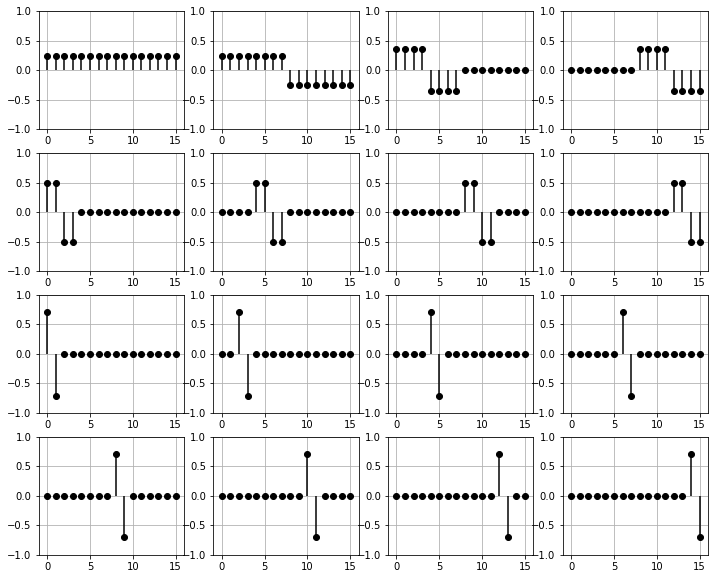

In [4]:
hh = haar(N)
fig, axs = plt.subplots(M, M, figsize=(12, 10))
axs = axs.ravel()
for i, h in enumerate(hh):
    axs[i].stem(n, h, basefmt=' ', linefmt='k', markerfmt='ko')
    axs[i].axis([-1, N, -1, 1])
plt.show()

### Décomposition d'un signal sur la base de Haar

Considérons le signal $x$ de taille $N=16$ ci-dessous.

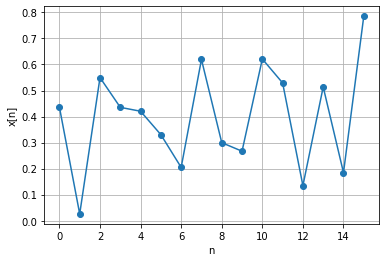

In [5]:
# Signal x
np.random.seed(seed=2)
x = np.random.random(N)

# Affichage
plt.figure()
plt.plot(n, x, "o-")
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

En utilisant le produit scalaire, on obtient les coefficients $\alpha_k = \langle x, \varphi_k \rangle$ ($k\in\{0,\dots,N-1\}$) représentés ci-dessous :

[ 1.5890548  -0.07829068 -0.0451545   0.03493984 -0.26153187 -0.03660849
 -0.29189699 -0.16080847  0.28996234  0.08085065  0.06366293 -0.29318226
  0.02321248  0.06504798 -0.26799218 -0.42489713]



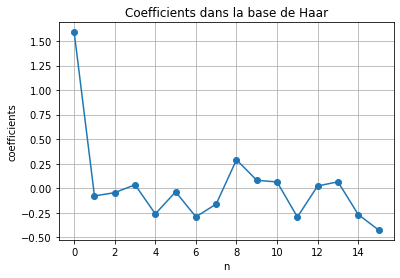

In [6]:
# Compression dans la base de Haar
b = haar(N)
c = np.zeros(N)
for i in range(N):
    c[i] = np.dot(x, b[i])

print(c)
print()

# Affichage
plt.figure()
plt.plot(n, c, "o-")
plt.xlabel('n')
plt.ylabel('coefficients')
plt.title('Coefficients dans la base de Haar')
plt.show()

### Compression du signal

In [7]:
# Compression dans la base canonique
x1 = x.copy()
j1 = np.argsort(np.abs(x1))[:N//2]
x1[j1] = 0

# Compression dans la base de Haar & reconstruction
c2 = c.copy()
j2 = np.argsort(np.abs(c2))[:N//2]
c2[j2] = 0
x2 = np.zeros(N)
for i in range (N):
    x2 += c2[i] * b[i]

# EQM
eqm1 = np.linalg.norm(x-x1)
eqm2 = np.linalg.norm(x-x2)

Dans cet exemple, nous allons considérer le cas d'une compression avec perte où l'on réduit de 50 % l'encombrement mémoire :
le signal de 16 échantillons ne sera donc enregistré que sur 8 valeurs.

En restant dans la base canonique, on peut se contenter de supprimer les 8 échantillons les plus faibles du signal : ceux-ci sont donc mis à 0.
Le signal reconstruit (donc en mettant des 0 à l'emplacement des échantillons supprimés) est représenté en orange.
On peut calculer l'erreur quadratique moyenne avec le signal original $x$ : elle est de 0,736.

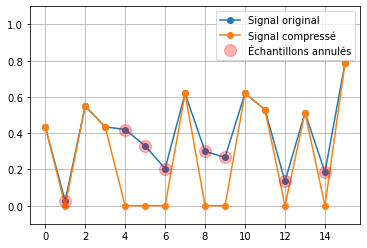

In [8]:
plt.figure(figsize=(13,4))

# Signal dans la base canonique
plt.subplot(1,2,1)
plt.plot(n,  x, "o-", color="C0", label="Signal original")
plt.plot(n, x1, "o-", color="C1", label="Signal compressé")
plt.plot(n[j1], x[j1], "o", color="r", label="Échantillons annulés", alpha=.3, markersize=12)
plt.ylim([-.1, 1.1])
# plt.title(f"Signal compressé\n(EQM = {eqm1:.3f})")
plt.legend()

plt.show()

On peut faire la même chose mais en annulant la moitié des coefficients de la base de Haar :
c'est donc les coefficients de la base qui sont enregistrés, et non les valeurs du signal.
Le signal reconstruit est reconstruit à partir des coefficients de la base de Haar, en mettant à 0 ceux qui ont été supprimés.
L'EQM du signal reconstruit est égale à 0,162.

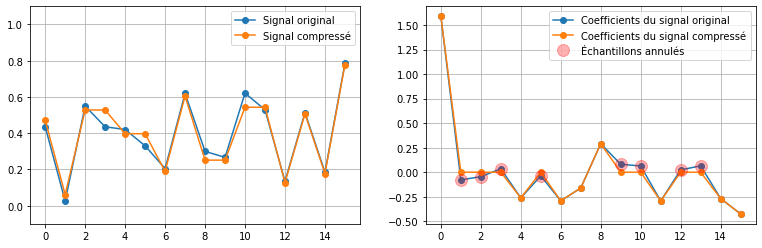

In [9]:
plt.figure(figsize=(13,4))

# Signal dans la base canonique
plt.subplot(1,2,1)
plt.plot(n,  x, "o-", color="C0", label="Signal original")
plt.plot(n, x2, "o-", color="C1", label="Signal compressé")
plt.ylim([-.1, 1.1])
# plt.title(f"Signal compressé\n(EQM = {eqm2:.3f})")
plt.legend()

# Coefficients dans la base de Haar
plt.subplot(1,2,2)
plt.plot(n,  c, "o-", color="C0", label="Coefficients du signal original")
plt.plot(n, c2, "o-", color="C1", label="Coefficients du signal compressé")
plt.plot(n[j2], c[j2], "o", color="r", label="Échantillons annulés", alpha=.3, markersize=12)
plt.legend()

plt.show()

On remarque que l'EQM sur le signal reconstruit est beaucoup plus faible dans le cas où la compression est effectuée dans la base de Haar.
L'erreur de reconstruction s'observe également sur le signal temporel :
le signal compressé en passant dans la base de Haar est beaucoup plus proche que le signal compressé directement dans le domaine temporel.
Cela illustre l'intérêt de changer de base pour effectuer une compression avec perte tout en limitant la perte d'information.

### Application à un véritable signal audio

In [10]:
# Chargement de la musique
fe, mus = wavfile.read("../_static/Elise.wav")

# Ne conserve que le début
M = 2**18
mus = mus[0:M]              # Musique originale
mu1 = np.zeros(mus.shape)   # Musique compressée dans la base canonique
mu2 = np.zeros(mus.shape)   # Musique compressée dans la base de Haar

# Paramètres
N = 16         # Nombre de points par morceau
L = 8          # Nombre de points conservés
K = int(M/N)   # Nombre de morceaux

# Vecteurs de la base et des coefficients
b = haar(N)
c = np.zeros(N)

for k in range(K):

    # Morceau du signal de N échantillons
    idx = range( (k*N-N), k*N)
    x = mus[idx]

    # Compression dans la base canonique
    x1 = x.copy()
    jdx = np.argsort(np.abs(x1))
    x1[jdx[:L]] = 0
    # x1[L:] = 0
    mu1[idx] = x1

    # Compression dans la base de Haar
    for i in range(N):
        c[i] = np.dot(x, b[i])
    jdx = np.argsort(np.abs(c))
    c[jdx[:L]] = 0
    # c[L:] = 0
    x2 = np.zeros(N)
    for i in range(N):
        x2 += c[i] * b[i]
    mu2[idx] = x2

La technique précédente a été appliquée sur un signal audio.
Pour cela, le signal a été découpé en morceaux de 16 échantillons et un taux de compression de 50 % a été appliqué.

Musique originale :

In [11]:
display(Audio(mus, rate=fe))

Compression dans la base canonique :

In [12]:
display(Audio(mu1, rate=fe))

Compression dans la base de Haar :

In [13]:
display(Audio(mu2, rate=fe))

In [14]:
# Test : compression de 25%, on garde 1 échantillon sur 4 en temporel et 25% des basses fréquences en Haar

# Chargement de la musique
fe, mus = wavfile.read("../_static/Elise.wav")

# Ne conserve que le début
M = 2**17
mus = mus[0:M]              # Musique originale
mu1 = np.zeros(mus.shape)   # Musique compressée dans la base canonique
mu2 = np.zeros(mus.shape)   # Musique compressée dans la base de Haar

# Paramètres
N = 16         # Nombre de points par morceau
L = 8          # Nombre de points conservés
K = int(M/N)   # Nombre de morceaux

# Vecteurs de la base et des coefficients
b = haar(N)
c = np.zeros(N)

for k in range(K):

    # Morceau du signal de N échantillons
    idx = range( (k*N-N), k*N)
    x = mus[idx]

    # Compression dans la base canonique
    x1 = x.copy()
    
    test = 1
    
    if test==0:
        x1[L:] = 0
    
    if test==1:
        x1[1::4] = 0
        x1[2::4] = 0
        x1[3::4] = 0
        
    if test==2:
        i = np.argsort(x1)
        x1[i[:L]] = 0
    
    
    mu1[idx] = x1

    # Compression dans la base de Haar
    for i in range(N):
        c[i] = np.dot(x, b[i])  
    c[4:] = 0
    x2 = np.zeros(N)
    for i in range(N):
        x2 += c[i] * b[i]
    mu2[idx] = x2
    
display(Audio(mus, rate=fe))
display(Audio(mu1, rate=fe))
display(Audio(mu2, rate=fe))